In [2]:
import gpxpy
import gpxpy.gpx
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from folium.vector_layers import Rectangle
from shapely.geometry import LineString
from shapely.ops import unary_union

In [3]:
import numpy as np
import gpxpy

gpx_file = open('/Users/ashwin/Desktop/wards and gps/fefa3de2-c689-4017-a629-baf7e68f5d69_493.gpx', 'r')
gpx = gpxpy.parse(gpx_file)
qt1 = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            qt1.append((point.latitude, point.longitude))

observations_array = np.array(qt1)
# print(observations_array)
qt1 = observations_array[:75]

In [4]:
import folium
from gpxpy import parse

gpx_file1 = open('/Users/ashwin/Desktop/wards and gps/fefa3de2-c689-4017-a629-baf7e68f5d69_493.gpx', 'r')
gpx = parse(gpx_file1)

map_center1 = [gpx.tracks[0].segments[0].points[0].latitude, gpx.tracks[0].segments[0].points[0].longitude]
mymap1 = folium.Map(location=map_center1, zoom_start=12)

for track in gpx.tracks:
    for segment in track.segments:
        lat_lon_pairs1 = [(point.latitude, point.longitude) for point in segment.points[:75]]  
        folium.PolyLine(lat_lon_pairs1, color="blue", weight=2.5, opacity=1).add_to(mymap1)

mymap1

In [5]:
import folium
from shapely.geometry import LineString
import gpxpy

gpx_file1 = open('/Users/ashwin/Desktop/wards and gps/fefa3de2-c689-4017-a629-baf7e68f5d69_493.gpx', 'r')
gpx = gpxpy.parse(gpx_file1)

all_points1 = []
for track in gpx.tracks:
    for segment in track.segments:
        all_points1.extend([(point.longitude, point.latitude) for point in segment.points[:75]]) 

route_line1 = LineString(all_points1)
buffer_distance1 = 0.001  
route_buffer1 = route_line1.buffer(buffer_distance1)
map_center1 = route_line1.centroid.coords[0][::-1] 
mymap1 = folium.Map(location=map_center1, zoom_start=14)
lat_lon_pairs1 = [(point[1], point[0]) for point in route_line1.coords]
folium.PolyLine(lat_lon_pairs1, color="blue", weight=2.5, opacity=1).add_to(mymap1)
route_buffer_geojson1 = route_buffer1.__geo_interface__
folium.GeoJson(route_buffer_geojson1, name='geofence').add_to(mymap1)
mymap1


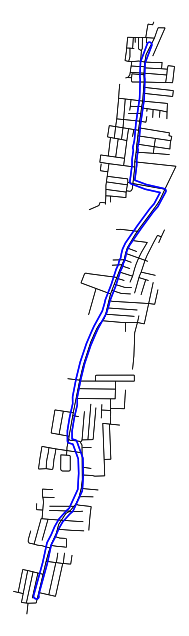

In [6]:
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
route_polygon1 = route_buffer1.convex_hull
G1 = ox.graph_from_polygon(route_polygon1, network_type='drive')
fig1, ax1 = ox.plot_graph(G1, bgcolor='w', edge_color='k', edge_linewidth=0.5, node_size=0, show=False, close=False)
route_line_buffer1 = route_line1.buffer(0.0001)  
ax1.plot(*route_line_buffer1.exterior.xy, color='blue', linewidth=1)
ax1.plot(*route_line_buffer1.exterior.xy[:75], color='blue', linewidth=1)
plt.show()


In [21]:
import osmnx as ox
import numpy as np
import pandas as pd
from shapely.geometry import LineString
route_polygon1 = route_buffer1.convex_hull
G1 = ox.graph_from_polygon(route_polygon1, network_type='drive')
states1 = np.array([(data1['y'], data1['x']) for node, data1 in G1.nodes(data=True)])
print("Number of nodes:", len(states1))
print("Node coordinates:")
for node in states1:
    print(node)

nodes_df = pd.DataFrame(states1, columns=['Latitude', 'Longitude'])

# Save the DataFrame to an Excel file
excel_file_path = '/Users/ashwin/Desktop/nodes1.xlsx'  # Change this path to your desired file location
nodes_df.to_excel(excel_file_path, index=False)

print("Nodes saved to Excel file:", excel_file_path)


Number of nodes: 306
Node coordinates:
[12.884756  77.6182356]
[12.8976788 77.6214247]
[12.9030173 77.6242333]
[12.9014205 77.6212131]
[12.9031245 77.621357 ]
[12.9029845 77.6224649]
[12.9057409 77.6228028]
[12.9032018 77.6224637]
[12.9022951 77.6223827]
[12.9020556 77.6237565]
[12.9046252 77.6226375]
[12.9042657 77.6240541]
[12.9065083 77.6240868]
[12.9065383 77.622868 ]
[12.907075  77.6238595]
[12.9071314 77.6228682]
[12.9071907 77.6241673]
[12.9072226 77.6238942]
[12.8847458 77.6178862]
[12.8864994 77.6186611]
[12.8885985 77.6196781]
[12.8888902 77.6199368]
[12.8891955 77.6200754]
[12.8895451 77.6201664]
[12.891604  77.6196319]
[12.8933031 77.6199444]
[12.8850346 77.619064 ]
[12.8850731 77.6188888]
[12.8850981 77.6187751]
[12.8851927 77.6183449]
[12.886385  77.6196602]
[12.88641   77.6193739]
[12.8864457 77.6190791]
[12.8974069 77.6213564]
[12.8983689 77.6216958]
[12.8972782 77.6230609]
[12.8991078 77.6220104]
[12.8990969 77.6215224]
[12.9035053 77.623958 ]
[12.9036063 77.6225222]
[

In [24]:
edges = []
for u, v, data in G1.edges(data=True):
    if 'geometry' in data:
        edge_coords = list(data['geometry'].coords)
    else:
        # if no geometry attribute, create LineString from node coordinates
        point_u = (G1.nodes[u]['x'], G1.nodes[u]['y'])
        point_v = (G1.nodes[v]['x'], G1.nodes[v]['y'])
        edge_coords = [point_u, point_v]
    edges.append(edge_coords)
print("Edge coordinates:")
for edge in edges:
    print(edge)


import simplekml

# Create a KML object
kml = simplekml.Kml()

# Add edges to the KML
for edge_coords in edges:
    if len(edge_coords) == 2:
        # LineString case where there are only start and end points
        line = kml.newlinestring(name="Edge", coords=edge_coords)
    else:
        # Case where edge_coords contains a list of coordinates
        line = kml.newlinestring(name="Edge", coords=edge_coords)
    
    line.style.linestyle.width = 2
    line.style.linestyle.color = simplekml.Color.blue

# Save the KML to a file
kml_file_path = '/Users/ashwin/Desktop/edges.kml'  # Change this path to your desired file location
kml.save(kml_file_path)

print("Edges saved to KML file:", kml_file_path)


Edge coordinates:
[(77.6182356, 12.884756), (77.6183449, 12.8851927)]
[(77.6182356, 12.884756), (77.6180339, 12.8847501), (77.6178862, 12.8847458)]
[(77.6214247, 12.8976788), (77.6213564, 12.8974069)]
[(77.6214247, 12.8976788), (77.6214827, 12.8978264)]
[(77.6214247, 12.8976788), (77.6210745, 12.8978062), (77.6208023, 12.8979051)]
[(77.6242333, 12.9030173), (77.6241074, 12.9030304), (77.6237305, 12.9030697), (77.6233446, 12.9031099), (77.6224637, 12.9032018)]
[(77.6242333, 12.9030173), (77.6238979, 12.9023408), (77.6237565, 12.9020556)]
[(77.6212131, 12.9014205), (77.6212119, 12.9014856)]
[(77.621357, 12.9031245), (77.6219859, 12.903045)]
[(77.621357, 12.9031245), (77.621308, 12.9027843)]
[(77.621357, 12.9031245), (77.6209655, 12.903183)]
[(77.6224649, 12.9029845), (77.6224637, 12.9032018)]
[(77.6224649, 12.9029845), (77.6223827, 12.9022951)]
[(77.6224649, 12.9029845), (77.6219859, 12.903045)]
[(77.6228028, 12.9057409), (77.6223046, 12.9058024)]
[(77.6228028, 12.9057409), (77.6228266, 

In [8]:
import numpy as np
from math import exp, sqrt, pi

pairwise_distances = []
for i in range(len(qt1) - 1):
    x1, y1 = qt1[i]
    x2, y2 = qt1[i + 1]
    distance = sqrt((x2 - x1)**2 + (y2 - y1)**2)
    pairwise_distances.append(distance)
TRANS = np.zeros((len(states1), len(states1), len(qt1)-1))

beta = 0.95  

n = len(states1)
for k in range(len(qt1)-1):
    for i in range(n):
        for j in range(n):
            xtemp = np.linalg.norm(states1[i] - states1[j])
            dij = abs(xtemp - pairwise_distances[k])
            TRANS[i, j, k] = (1 / beta) * exp(-dij / beta)
        TRANS[i, :, k] = TRANS[i, :, k] / np.sum(TRANS[i, :, k])

sigztemp = []
for i in range(len(qt1)):
    for j in range(len(states1)):
        sigztemp.append(np.linalg.norm(qt1[i] - states1[j]))
sigz = 1.4 * np.median(sigztemp)

EMIS = np.zeros((len(states1), len(qt1)))
for i in range(len(qt1)):
    for j in range(len(states1)):
        EMIS[j, i] = (1 / (sqrt(2 * pi) * sigz)) * exp(-0.5 * ((np.linalg.norm(qt1[i] - states1[j])) / sigz) ** 2)

# seq = [1, 2, 3, 4]
seq = np.arange(1, len(qt1)+1)

PRIOR = np.array([(1 / len(states1))] * len(states1))
# PRIOR[358] = 0.7

T = len(seq)  # Number of observations
n = EMIS.shape[0]  # Number of states

score = np.zeros((n, T))
pred = np.zeros((n, T))

for i in range(n):
    score[i, 0] = PRIOR[i] * EMIS[i, seq[0] - 1]

for t in range(1, T):
    for j in range(n):
        tscore = np.zeros(n)
        for k in range(n):
            tscore[k] = score[k, t - 1] * TRANS[k, j, t - 1] * EMIS[j, seq[t] - 1]
        score[j, t] = np.max(tscore)
        id = np.where(tscore == np.max(tscore))[0][0]
        pred[j, t] = id

IT1 = np.zeros(T, dtype=int)
IT1[-1] = np.argmax(score[:, -1])

for t in range(T - 1, 0, -1):
    IT1[t - 1] = int(pred[IT1[t], t])

print(IT1)

[293 293 293 138 294 142 168 199 200 146 208  20  23  87  87  74  24  72
  64 288 288 288  63  25  25  25  67  52  53  53  50  50 123  33  33 100
  91  91 102  96  96  36  45  45 298 106   9   9   9   8   8 103   5   7
   7  39  39  39  39  39  41  41  41  42 150 150 111 276 276 223 273 273
 183 270 270]


In [9]:
coordinates_IT1 = states1[IT1]
print(coordinates_IT1)

[[12.8849574 77.6180676]
 [12.8849574 77.6180676]
 [12.8849574 77.6180676]
 [12.8859558 77.6185295]
 [12.886009  77.6183092]
 [12.8862356 77.6185973]
 [12.8871634 77.6188723]
 [12.8875367 77.6190344]
 [12.8878398 77.6191444]
 [12.8882166 77.6193169]
 [12.8885709 77.6196305]
 [12.8885985 77.6196781]
 [12.8895451 77.6201664]
 [12.8901073 77.620211 ]
 [12.8901073 77.620211 ]
 [12.8910354 77.620203 ]
 [12.891604  77.6196319]
 [12.8914365 77.619591 ]
 [12.8917268 77.6196454]
 [12.8925879 77.619803 ]
 [12.8925879 77.619803 ]
 [12.8925879 77.619803 ]
 [12.8927133 77.619826 ]
 [12.8933031 77.6199444]
 [12.8933031 77.6199444]
 [12.8933031 77.6199444]
 [12.8940356 77.6200953]
 [12.8940732 77.6201028]
 [12.894491  77.6202024]
 [12.894491  77.6202024]
 [12.8965575 77.6210741]
 [12.8965575 77.6210741]
 [12.8970939 77.6212788]
 [12.8974069 77.6213564]
 [12.8974069 77.6213564]
 [12.8980894 77.621586 ]
 [12.8986013 77.621787 ]
 [12.8986013 77.621787 ]
 [12.8988554 77.6218927]
 [12.898899  77.6219122]


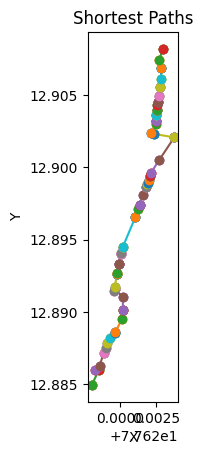

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
G1 = nx.Graph()
for i in range(len(IT1) - 1):
    G1.add_edge(IT1[i], IT1[i + 1])
shortest_paths = [nx.shortest_path(G1, IT1[i], IT1[i + 1]) for i in range(len(IT1) - 1)]
def display_shortest_paths(paths, states):
    fig, ax = plt.subplots()
    for path in paths:
        path_coordinates = [states[i] for i in path]
        path_coordinates.append(states[path[-1]])  # Append last point to close the path
        x, y = zip(*path_coordinates)
        ax.plot(y, x, marker='o')
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Shortest Paths')
    plt.show()
display_shortest_paths(shortest_paths, states1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


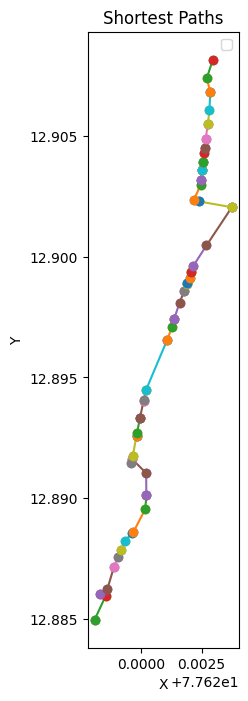

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

def display_shortest_paths(paths, states):
    fig, ax1 = plt.subplots(figsize=(8, 8))  # Adjust figure size for better visualization
    for i, path in enumerate(paths):
        path_coordinates = [states[i] for i in path]
        x, y = zip(*path_coordinates)
        ax1.plot(y, x, marker='o')  # Plot each path separately with a label
    ax1.set_aspect('equal')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_title('Shortest Paths')
    ax1.legend()  # Show legend to differentiate between paths
    plt.show()

G1 = nx.Graph()
for i in range(len(IT1) - 1):
    G1.add_edge(IT1[i], IT1[i + 1])
shortest_paths = [nx.shortest_path(G1, IT1[i], IT1[i + 1]) for i in range(len(IT1) - 1)]

# Display the shortest paths
display_shortest_paths(shortest_paths, states1)


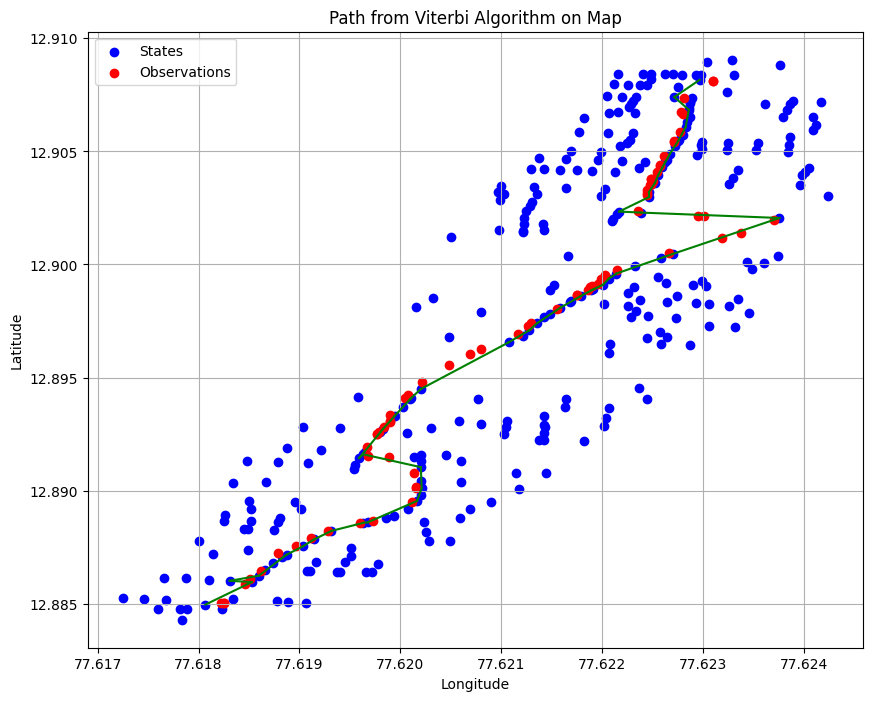

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(states1[:, 1], states1[:, 0], color='blue', label='States')
plt.scatter(qt1[:, 1], qt1[:, 0], color='red', label='Observations')
for i in range(len(IT1) - 1 - 0):
    start_point = states1[IT1[i]]
    end_point = states1[IT1[i + 1]]
    plt.plot([start_point[1], end_point[1]], [start_point[0], end_point[0]], color='green')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Path from Viterbi Algorithm on Map')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


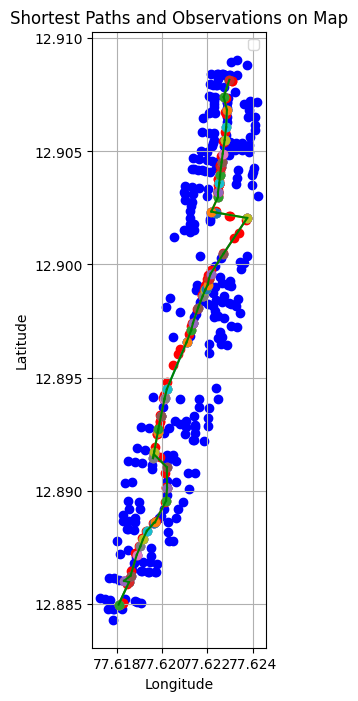

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

def display_shortest_paths(paths, states):
    fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figure size for better visualization
    for i, path in enumerate(paths):
        path_coordinates = [states[i] for i in path]
        x, y = zip(*path_coordinates)
        ax.plot(y, x, marker='o')  # Plot each path separately with a label

    plt.scatter(states[:, 1], states[:, 0], color='blue')
    plt.scatter(qt1[:, 1], qt1[:, 0], color='red')
    for i in range(len(IT1) - 1):
        start_point = states[IT1[i]]
        end_point = states[IT1[i + 1]]
        ax.plot([start_point[1], end_point[1]], [start_point[0], end_point[0]], color='green')

    ax.set_aspect('equal')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Shortest Paths and Observations on Map')
    ax.legend()  # Show legend to differentiate between paths
    plt.grid(True)
    plt.show()

G1 = nx.Graph()
for i in range(len(IT1) - 1):
    G1.add_edge(IT1[i], IT1[i + 1])
shortest_paths = [nx.shortest_path(G1, IT1[i], IT1[i + 1]) for i in range(len(IT1) - 1)]

# Display the shortest paths along with states and observations
display_shortest_paths(shortest_paths, states1)
